In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pyrivet import rivet
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from pyDowker.DowkerComplex import DowkerComplex
from pyDowker.TwoParameterUtils import discretize_graded_rank, graded_rank_at_value
import seaborn as sns
import pickle


In [2]:
gene = pd.read_csv(
    "./Gene_cancer/data.csv", sep=",", index_col=0
)  # , header = True)
headers_gene = gene.columns.values

labels = pd.read_csv("./Gene_cancer/labels.csv", sep=",", index_col=0)
sorted_index = labels.sort_values('Class').index

print(gene.shape, labels.shape)
gene

(801, 20531) (801, 1)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [3]:
sorted_index = labels.sort_values("Class").index

X = gene.loc[sorted_index].to_numpy()
y = labels.loc[sorted_index].Class.to_numpy()

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_num = le.fit_transform(y)

In [4]:
pca = PCA(n_components = 100)
D = pairwise_distances(X, metric='cosine', n_jobs=-1)

knn_mat = np.argsort(np.argsort(D))

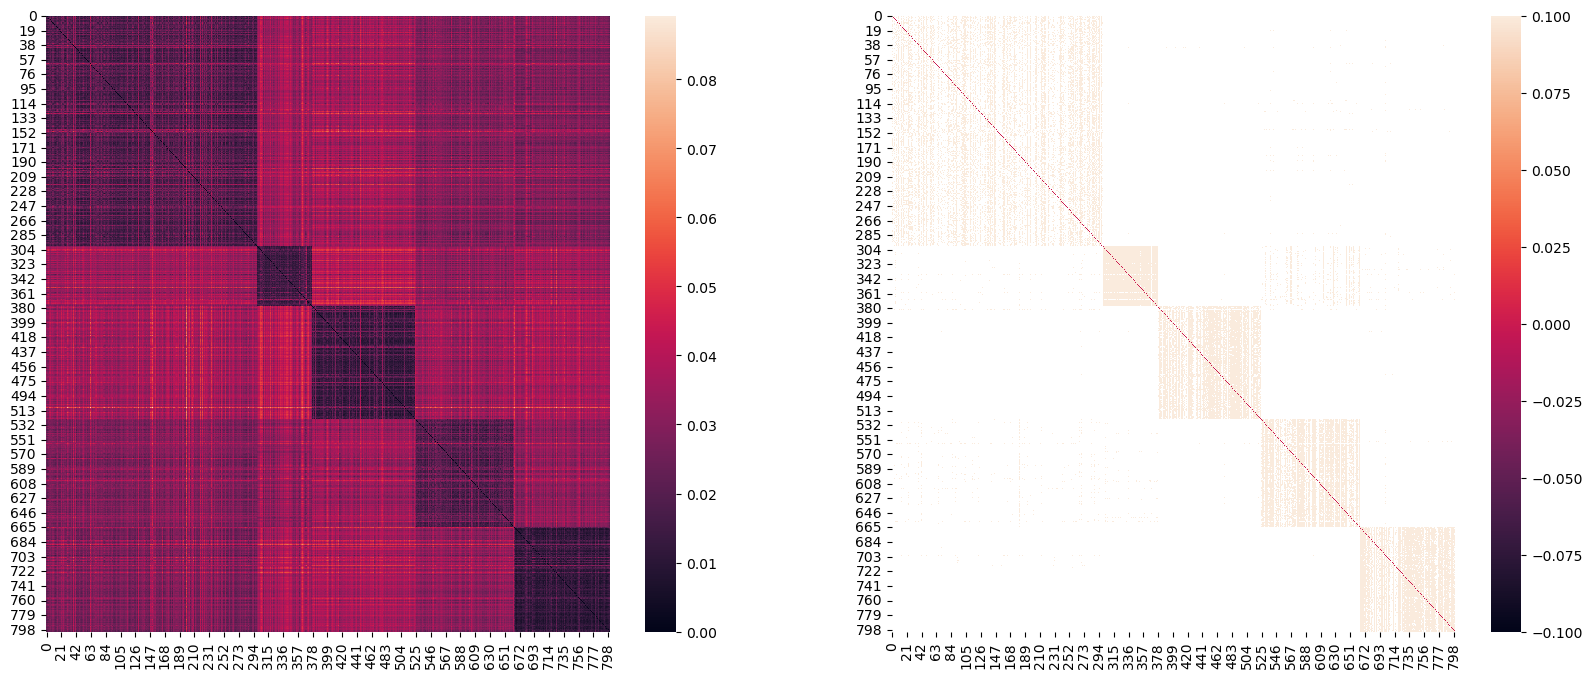

In [5]:
f,ax = plt.subplots(1,2,figsize = (20,8))
sns.heatmap(D,ax=ax[0])
sns.heatmap(np.where(knn_mat<100, knn_mat, np.inf), ax=ax[1])
plt.show()

In [6]:
%%time
m_max = 64
LAMBDA = np.where(knn_mat<100, knn_mat, np.inf)

dowker = DowkerComplex(LAMBDA, max_filtration=100)

bifi = dowker.create_rivet_bifiltration(max_dimension=1, m_max=m_max)
betti = rivet.betti(bifi,homology=0,x=m_max,y=m_max)

output = open('output/Gene_cancer_betti.pkl'.format(m_max), 'wb')
pickle.dump(betti, output)
output.close()

CPU times: user 9.78 s, sys: 164 ms, total: 9.95 s
Wall time: 28.9 s


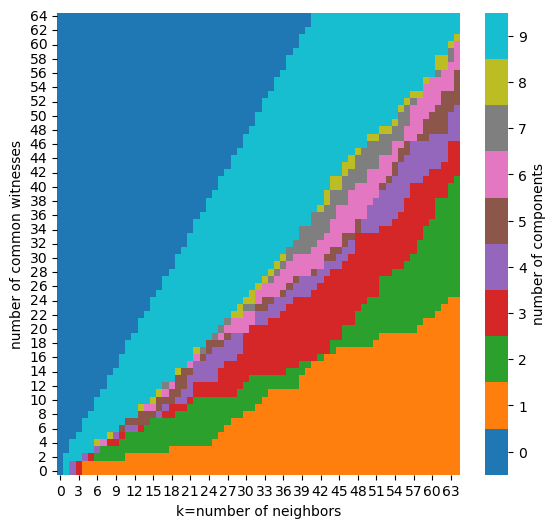

In [11]:
x_grid = np.linspace(0,100,m_max+1)
y_grid = np.linspace(-m_max,0,m_max+1)


gridbetti = discretize_graded_rank(betti,x_grid,y_grid)

v_min = None
v_max = 10
#lnorm = LogNorm(vmin=v_min,vmax=v_max)
colormap = sns.color_palette("binary", as_cmap=True)

f,ax = plt.subplots(1,1,figsize=(6.5,6))
sns.heatmap(gridbetti[:][::-1],
            rasterized=True,
            linewidths=0,
            ax=ax,
            annot=False,
            #yticklabels=-y_grid,
            #xticklabels=np.round(x_grid,2),
            cmap=plt.cm.tab10,
            vmin = -0.5,
            vmax=9.5,
           cbar_kws={'ticks':np.arange(11), 'label':'number of components'})
ax.invert_yaxis()


ax.set_ylabel("number of common witnesses")
ax.set_xlabel("k=number of neighbors")
plt.grid(False)
plt.savefig("output/gene_cancer_neighbors_H0_custer.pdf".format(m_max), bbox_inches='tight', pad_inches=0)
plt.show()

In [12]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(np.arange(len(X)))
k = 60 # number of nearest neighbors
m = 20 # weight, i.e. number of common neighbors needed for connection
for i in G.nodes():
    for j in G.nodes():
        if i!=j and np.sum(np.logical_and(knn_mat[i]<= k, knn_mat[j]<= k))>=m:
            G.add_edge(i,j)
len(list(nx.components.connected_components(G)))

3

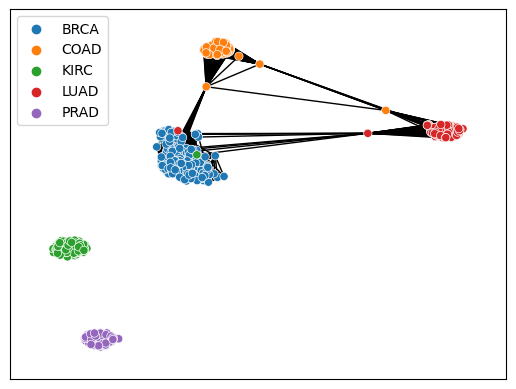

In [13]:
f,ax = plt.subplots()
pos=nx.spring_layout(G, seed=42)
points = np.array(list(pos.values()))
nx.draw_networkx_edges(G, pos=pos)
sns.scatterplot(x=points[:,0],y =points[:,1], hue = labels.loc[sorted_index]['Class'], ax=ax)
#nx.draw_networkx(G, pos=pos, node_color = y_num, with_labels=False)
plt.legend()
plt.savefig('output/gene_cancer_graph_plot_k={}_m={}.pdf'.format(k,m), bbox_inches='tight', pad_inches=0)
plt.show()

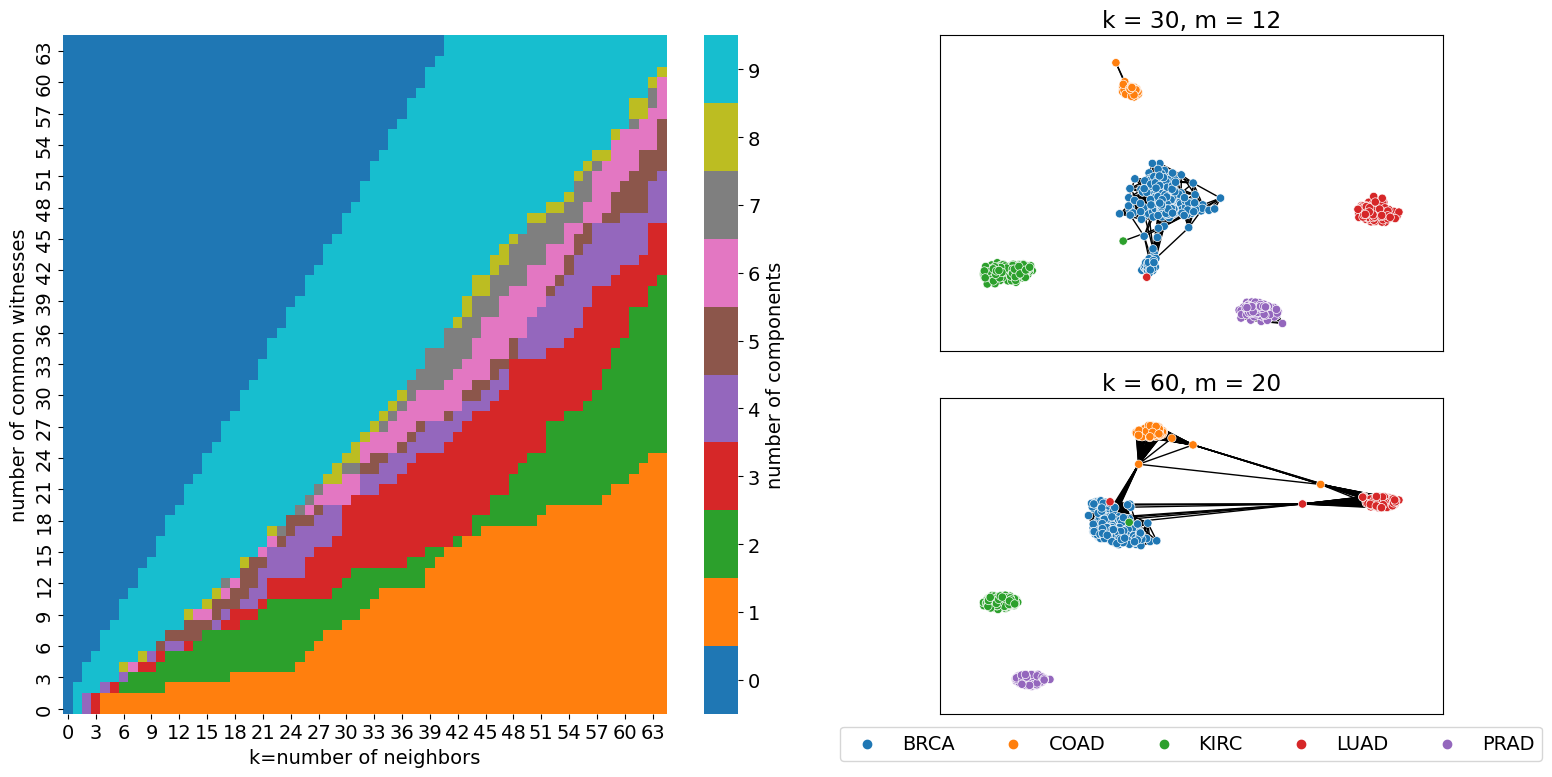

In [14]:
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2,2, figsize = (16,8), width_ratios=[3, 2])
gs = axs[0, 0].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])
sns.heatmap(gridbetti[:][::-1],
            rasterized=True,
            linewidths=0,
            ax=axbig,
            annot=False,
            #yticklabels=-y_grid,
            #xticklabels=np.round(x_grid,2),
            cmap=plt.cm.tab10,
            vmin = -0.5,
            vmax=9.5,
           cbar_kws={'ticks':np.arange(11), 'label':'number of components'})
axbig.invert_yaxis()


axbig.set_ylabel("number of common witnesses")
axbig.set_xlabel("k=number of neighbors")

ks = [30,60]
ms = [12,20]

for l in range(2):
    G = nx.Graph()
    G.add_nodes_from(np.arange(len(X)))
    k = ks[l] # number of nearest neighbors
    m = ms[l] # weight, i.e. number of common neighbors needed for connection
    for i in G.nodes():
        for j in G.nodes():
            if i!=j and np.sum(np.logical_and(knn_mat[i]<= k, knn_mat[j]<= k))>=m:
                G.add_edge(i,j)
    len(list(nx.components.connected_components(G)))
    pos=nx.spring_layout(G, seed=42)
    points = np.array(list(pos.values()))
    nx.draw_networkx_edges(G, pos=pos, ax=axs[l,1])
    axs[l,1].set_title('k = {}, m = {}'.format(k,m))
    sns.scatterplot(x=points[:,0],y =points[:,1], hue = labels.loc[sorted_index]['Class'], ax=axs[l,1], legend=l>0)
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)

fig.tight_layout()
plt.savefig('output/gene_cancer_subplots.pdf')
plt.show()